In [2]:
!pip install keras-tuner

  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=7b615919e8407d56dcdf2d4354681b5593b039c8e8ef20a3b9013d09480cd48c
  Stored in directory: c:\users\14694\appdata\local\pip\cache\wheels\78\e2\80\7fe373cad54ad22b06d0d6204cbc29cead9e69bb2680327775
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=b7eca590e5c5bbbddc1ba9723a9229f126fad3cf8e10c255ee2adc9a591f8559
  Stored in directory: c:\users\14694\appdata\local\pip\cache\wheels\ba\ad\c8\2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables


In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_circles

# Creating dummy nonlinear data
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, random_state=78)

# Transforming y_circles to a vertical vector
y_circles = y_circles.reshape(-1, 1)

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

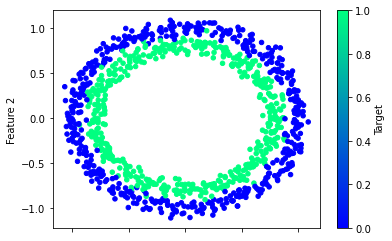

In [4]:
# Creating a DataFrame to plot the nonlinear dummy data
df_circles = pd.DataFrame(X_circles, columns=["Feature 1", "Feature 2"])
df_circles["Target"] =y_circles

# Plot the nonlinear dummy data
df_circles.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [5]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [6]:
# Import the kerastuner library
import kerastuner as kt
# Create a `Hyperband()` tuner instance
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [7]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.6000000238418579

Best val_accuracy So Far: 0.6639999747276306
Total elapsed time: 00h 02m 00s
INFO:tensorflow:Oracle triggered exit


In [20]:
# Get top 3 model hyperparameters and print the values
first_best_hyper = tuner.get_best_hyperparameters(1)[0]
first_best_hyper.values

{'activation': 'sigmoid',
 'first_units': 7,
 'num_layers': 1,
 'units_0': 1,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 5,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [23]:
second_nd_best_hyper = tuner.get_best_hyperparameters(2)[0]
second_nd_best_hyper.values

{'activation': 'sigmoid',
 'first_units': 7,
 'num_layers': 1,
 'units_0': 1,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 5,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [24]:
third_rd_best_hyper = tuner.get_best_hyperparameters(3)[0]
third_rd_best_hyper.values

{'activation': 'sigmoid',
 'first_units': 7,
 'num_layers': 1,
 'units_0': 1,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 5,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [25]:
top_hyper = tuner.get_best_hyperparameters(3)
top_hyper

In [26]:
#For printing the values of top_hyper
for param in top_hyper:
    print(param.values)

{'activation': 'sigmoid', 'first_units': 7, 'num_layers': 1, 'units_0': 1, 'units_1': 7, 'units_2': 5, 'units_3': 9, 'units_4': 5, 'units_5': 5, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 7, 'num_layers': 5, 'units_0': 9, 'units_1': 5, 'units_2': 1, 'units_3': 9, 'units_4': 5, 'units_5': 5, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'sigmoid', 'first_units': 3, 'num_layers': 5, 'units_0': 3, 'units_1': 7, 'units_2': 9, 'units_3': 5, 'units_4': 5, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [27]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
        model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
        print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6916 - accuracy: 0.6640
Loss: 0.6915668249130249, Accuracy: 0.6639999747276306
8/8 - 0s - loss: 0.6787 - accuracy: 0.6000
Loss: 0.6786807179450989, Accuracy: 0.6000000238418579
8/8 - 0s - loss: 0.6790 - accuracy: 0.5920
Loss: 0.6789844036102295, Accuracy: 0.5920000076293945


In [ ]:
# Get second best model hyperparameters


In [ ]:
# Compare the performance to the second-best model
